In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import datasets

In [38]:
X, y = datasets.make_regression(100, 2, noise = 20, random_state=42)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

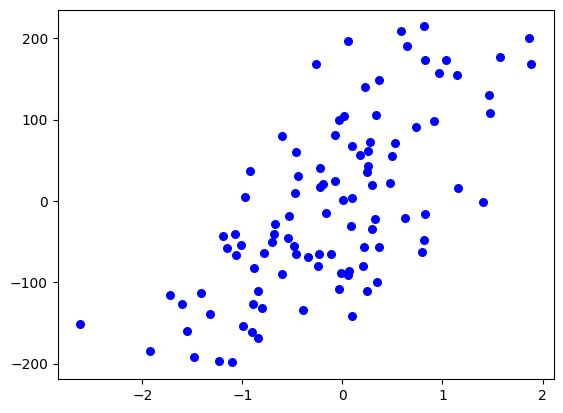

In [40]:
plt.scatter(X[:, 0], y, color = 'b', marker= 'o', s = 30)
plt.show()

In [41]:
class LinearRegression:
	def __init__(self, n_features) -> None:
		self.n_features = n_features

		# self.m = np.random.random(n_dims)

		self.w = np.zeros(n_features)

		self.b = 0

	def fit(self, X, y, epochs = 1000, lr = 0.0001):

		for epoch in tqdm(range(epochs)):
			dw, db = self.gradient_descend(X, y)

			self.w -= lr * dw
			self.b -= lr * db
	
	def gradient_descend(self, X, y):
		n_samples = X.shape[0]

		y_predicted = self.predicted(X)

		dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
		db = (1/n_samples) * np.sum(y_predicted-y)

		return dw, db


	def score(self, X: np.ndarray, y: np.ndarray):
		return 1 - self.MSE(X, y)/ (y.std() * y.std())
	
	def predicted(self, X: np.ndarray):
		if len(X.shape) == 2:
			return np.dot(X, self.w) + self.b
		elif len(X.shape) < 2:
			return (X * self.w).sum() + self.b
	
	def MSE(self, X: np.ndarray, y: np.ndarray):		
		return np.mean((y - self.predicted(X))**2)

In [42]:
model = LinearRegression(X_train.shape[1])

In [43]:
model.score(X_test, y_test)

-0.04138236790030181

In [44]:
model.fit(X_train, y_train, lr = 0.1)

100%|██████████| 1000/1000 [00:00<00:00, 86112.96it/s]


In [45]:
model.score(X_test, y_test)

0.9840601456776608

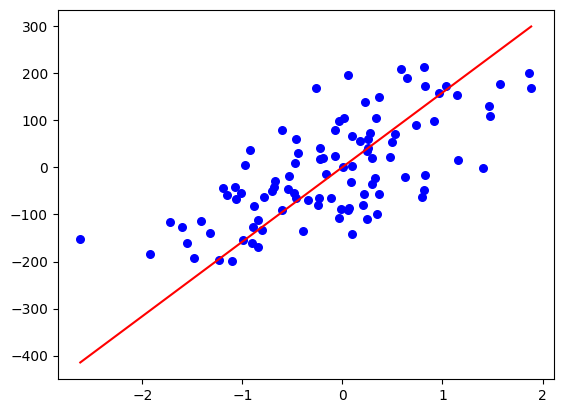

In [46]:
plt.scatter(X[:, 0], y, color = 'b', marker= 'o', s = 30)
X_min = X[:, 0].min()
X_max = X[:, 0].max()
plt.plot([X_min, X_max], [model.predicted(X_min), model.predicted(X_max)], c = 'red')
plt.show()